# Scopus API in Mathematica

by Vishank Patel

These recipe examples use the Elsevier Scopus API and Mathematica’s inbuilt functionalities to manipulate and visualize data. Code was tested and sample data downloaded from the Scopus API on March 6,
2022 via http://api.elsevier.com and http://www.scopus.com. This tutorial content is intended to help
facilitate academic research. Before continuing or reusing any of this code, please be aware of Elsevier's API policies and appropriate use-cases. You will also need to register for an API key in order to use
the Scopus API.

### Setup

We will start by setting up the API key. If you do not have a key already, one can be obtained from the
following link: https://dev.elsevier.com/apikey/manage.

Once obtained, save the key in a text file in the same directory as the current Mathematica notebook
and import your key as follows:

In [ ]:
myAPIKey = Import["INSERT PATH HERE"]; 

We will concatenate the key at the end of every URL using <>, the shortcut for StringJoin.

## 1. Get Author Data

#### Number of Records for Author

We will be using the import function instead of URLExecute as it allows us to specify the import format.
Raw JSON is chosen as the format as it interprets the data as Mathematica associations that are much
easier to work with compared to lists of lists.

In [ ]:
rawAuthorSearch = Import["https://api.elsevier.com/content/search/scopus?query=AU-ID(55764087400)&apiKey="<> myAPIKey,"RawJSON"]; 
rawAuthorSearch // Short

<|search-results -> <|opensearch:totalResults -> 21, <<5>>|>|>

As we can see, the total number of results is 21.

All the data lies under the key "entry", hence,

In [ ]:
authorSearch = rawAuthorSearch["search-results"]["entry"];

The Raw JSON file is converted into Mathematica associations, which can be queried using the keys listed below:

In [ ]:
Keys[authorSearch][[1]]

{@_fa, link, prism:url, dc:identifier, eid, dc:title, dc:creator, prism:publicationName, 
 
>   prism:issn, prism:eIssn, prism:volume, prism:issueIdentifier, prism:pageRange, 
 
>   prism:coverDate, prism:coverDisplayDate, prism:doi, citedby-count, affiliation, 
 
>   prism:aggregationType, subtype, subtypeDescription, source-id, openaccess, 
 
>   openaccessFlag}

Extracting all the DOIs from the author,

In [ ]:
authorSearch[[All,"prism:doi"]]

{10.1021/acs.jchemed.1c00904, 10.5860/crln.82.9.428, 10.1021/acs.iecr.8b02573, 
 
>   10.1021/acs.jchemed.6b00602, 10.5062/F4TD9VBX, 10.1021/acs.macromol.6b02005, 
 
>   10.1186/s13321-016-0181-z, 10.1021/acs.chemmater.5b04431, 
 
>   10.1021/acs.jchemed.5b00512, 10.1021/acs.jchemed.5b00375, 10.5860/crln.76.9.9384, 
 
>   10.5860/crln.76.2.9259, 10.1126/science.346.6214.1258, 10.1021/ed400887t, 
 
>   10.1016/j.acalib.2014.03.015, 10.5062/F4XS5SB9, 10.1021/ma300328u, 
 
>   10.1021/mz200108a, 10.1021/ma201170y, 10.1021/ma200184u, 10.1021/cm102374t}

The respective titles for the DOIs above:

In [ ]:
authorSearch[[All,"dc:title"]]

{Using NCBI Entrez Direct (EDirect) for Small Molecule Chemical Information Searching in\
 
>    a Unix Terminal, Using the linux operating system full-time tips and experiences\
 
>    from a subject liaison librarian, 
 
>   Analysis of the Frequency and Diversity of 1,3-Dialkylimidazolium Ionic Liquids\
 
>    Appearing in the Literature, Rapid Access to Multicolor Three-Dimensional Printed\
 
>    Chemistry and Biochemistry Models Using Visualization and Three-Dimensional\
 
>    Printing Software Programs, Text analysis of chemistry thesis and dissertation\
 
>    titles, Phototunable Thermoplastic Elastomer Hydrogel Networks, 
 
>   Programmatic conversion of crystal structures into 3D printable files using Jmol, 
 
>   Dangling-End Double Networks: Tapping Hidden Toughness in Highly Swollen\
 
>    Thermoplastic Elastomer Hydrogels, 
 
>   Replacing the Traditional Graduate Chemistry Literature Seminar with a Chemical\
 
>    Research Literacy Course, 3D Printed Block Copolymer Nanostructures, 
 
>   Hypotheses in librarianship: Applying the scientific method, 
 
>   Recruiting students to campus: Creating tangible and digital products in the\
 
>    academic library, Finally free, 
 
>   3D printed molecules and extended solid models for teaching symmetry and point\
 
>    groups, Repurposing Space in a Science and Engineering Library: Considerations for\
 
>    a Successful Outcome, A model for managing 3D printing services in academic\
 
>    libraries, Morphological phase behavior of poly(RTIL)-containing diblock copolymer\
 
>    melts, Network formation in an orthogonally self-assembling system, 
 
>   Access to nanostructured hydrogel networks through photocured body-centered cubic\
 
>    block copolymer melts, Synthesis and ordered phase separation of imidazolium-based\
 
>    alkyl-ionic diblock copolymers made via ROMP, 
 
>   Thermally stable photocuring chemistry for selective morphological trapping in block\
 
>    copolymer melt systems}

--------------------
Citation information:

In [ ]:
citationList = authorSearch[[All,"citedby-count"]]

{0, 0, 16, 24, 4, 11, 20, 6, 10, 25, 0, 0, 0, 96, 6, 34, 39, 31, 18, 45, 11}

## 2. Author Data in a Loop

### Number of Records for Author

In [ ]:
authorList = Import["INSERT PATH HERE","TSV"]

{{Emy Decker, 36660678600}, {Lindsey Lowry, 57210944451}, {Karen Chapman, 35783926100}, 
 
>   {Kevin Walker, 56133961300}, {Sara Whitver, 57194760730}}

Finding the number of records for each author:

In [ ]:
numRecords={};
For[i=1,i<=Length[authorList],i++,
    tempAuthorURL="https://api.elsevier.com/content/search/scopus?query=AU-ID("<>ToString[authorList[[i,2]]]<>")&apiKey="<>myAPIKey;
    tempAuthorData=Import[tempAuthorURL,"RawJSON"]["search-results"];
    AppendTo[numRecords,Flatten[{authorList[[i]],tempAuthorData["opensearch:totalResults"]}]];
    Pause[1]
];
numRecords

{{Emy Decker, 36660678600, 14}, {Lindsey Lowry, 57210944451, 4}, 
 
>   {Karen Chapman, 35783926100, 29}, {Kevin Walker, 56133961300, 8}, 
 
>   {Sara Whitver, 57194760730, 4}}

### Download Record Data

Let's say we want the DOIs and cited by counts in a list

In [ ]:
cites={};
For[i=1,i<=Length[authorList],i++,
    tempAuthorURL="https://api.elsevier.com/content/search/scopus?query=AU-ID("<>ToString[authorList[[i,2]]]<>")&apiKey="<>myAPIKey;
    tempAuthorData=Import[tempAuthorURL,"RawJSON"]["search-results"]["entry"];
    AppendTo[cites,{authorList[[i,1]],tempAuthorData[[All,"prism:doi"]],tempAuthorData[[All,"citedby-count"]]}];
    Pause[1]
];

In [ ]:
cites[[1;;2]]

{{Emy Decker, {10.1108/RSR-08-2021-0051, 10.1080/1072303X.2021.1929642, 
 
>     10.1080/15367967.2021.1900740, 10.1080/15367967.2020.1826951, 
 
>     10.1080/10691316.2020.1781725, 10.1145/3347709.3347805, 
 
>     10.4018/978-1-5225-5631-2.ch09, 10.1016/B978-0-08-102409-6.00007-9, 
 
>     10.1108/LM-10-2016-0078, 10.1016/B978-0-08-100775-4.00010-8, 
 
>     10.1108/S0732-067120160000036013, 10.4018/978-1-4666-8624-3, 
 
>     10.1108/S0065-2830(2013)0000037006, 10.1108/07378831011096268}, 
 
>    {0, 0, 7, 0, 0, 0, 3, 0, 6, 1, 2, 0, 0, 10}}, 
 
>   {Lindsey Lowry, {10.1080/1941126X.2021.1949153, 10.5860/lrts.65n1.4-13, 
 
>     10.1080/00987913.2020.1733173, 10.1080/1941126X.2019.1634951}, {1, 0, 1, 0}}}

In [ ]:
Transpose[{cites[[1,2]],cites[[1,3]]}]

{{10.1108/RSR-08-2021-0051, 0}, {10.1080/1072303X.2021.1929642, 0}, 
 
>   {10.1080/15367967.2021.1900740, 7}, {10.1080/15367967.2020.1826951, 0}, 
 
>   {10.1080/10691316.2020.1781725, 0}, {10.1145/3347709.3347805, 0}, 
 
>   {10.4018/978-1-5225-5631-2.ch09, 3}, {10.1016/B978-0-08-102409-6.00007-9, 0}, 
 
>   {10.1108/LM-10-2016-0078, 6}, {10.1016/B978-0-08-100775-4.00010-8, 1}, 
 
>   {10.1108/S0732-067120160000036013, 2}, {10.4018/978-1-4666-8624-3, 0}, 
 
>   {10.1108/S0065-2830(2013)0000037006, 0}, {10.1108/07378831011096268, 10}}

Dataset[{{Emy Decker, 10.1108/RSR-08-2021-0051, 0}, 
 
>    {Emy Decker, 10.1080/1072303X.2021.1929642, 0}, 
 
>    {Emy Decker, 10.1080/15367967.2021.1900740, 7}, 
 
>    {Emy Decker, 10.1080/15367967.2020.1826951, 0}, 
 
>    {Emy Decker, 10.1080/10691316.2020.1781725, 0}, 
 
>    {Emy Decker, 10.1145/3347709.3347805, 0}, 
 
>    {Emy Decker, 10.4018/978-1-5225-5631-2.ch09, 3}, 
 
>    {Emy Decker, 10.1016/B978-0-08-102409-6.00007-9, 0}, 
 
>    {Emy Decker, 10.1108/LM-10-2016-0078, 6}, 
 
>    {Emy Decker, 10.1016/B978-0-08-100775-4.00010-8, 1}, 
 
>    {Emy Decker, 10.1108/S0732-067120160000036013, 2}, 
 
>    {Emy Decker, 10.4018/978-1-4666-8624-3, 0}, 
 
>    {Emy Decker, 10.1108/S0065-2830(2013)0000037006, 0}, 
 
>    {Emy Decker, 10.1108/07378831011096268, 10}, 
 
>    {Lindsey Lowry, 10.1080/1941126X.2021.1949153, 1}, 
 
>    {Lindsey Lowry, 10.5860/lrts.65n1.4-13, 0}, 
 
>    {Lindsey Lowry, 10.1080/00987913.2020.1733173, 1}, 
 
>    {Lindsey Lowry, 10.1080/1941126X.2019.1634951, 0}, 
 
>    {Karen Chapman, 10.1016/j.acalib.2021.102396, 0}, 
 
>    {Karen Chapman, 10.1108/RSR-08-2021-0051, 0}, 
 
>    {Karen Chapman, 10.1108/IJLM-04-2019-0110, 15}, 
 
>    {Karen Chapman, 10.1080/10528008.2018.1533412, 3}, 
 
>    {Karen Chapman, 10.1016/j.acalib.2017.02.018, 2}, 
 
>    {Karen Chapman, 10.1108/IJPDLM-12-2015-0301, 10}, 
 
>    {Karen Chapman, 10.1080/01639269.2014.934127, 0}, 
 
>    {Karen Chapman, 10.1080/01639269.2013.837799, 3}, 
 
>    {Karen Chapman, 10.1108/09574091111181390, 17}, 
 
>    {Karen Chapman, 10.1080/08963568.2010.487690, 10}, 
 
>    {Karen Chapman, 10.1080/08963560802424771, 1}, 
 
>    {Karen Chapman, 10.1002/j.2158-1592.2009.tb00119.x, 21}, 
 
>    {Karen Chapman, 10.1300/J103v26n01_03, 7}, 
 
>    {Karen Chapman, 10.5860/crl.67.1.50, 11}, 
 
>    {Karen Chapman, 10.1300/J109v10n02_03, 4}, 
 
>    {Karen Chapman, 10.5860/crl.64.6.468, 13}, 
 
>    {Karen Chapman, 10.1300/J103v21n01_03, 1}, 
 
>    {Karen Chapman, 10.1300/J109v07n04_03, 6}, 
 
>    {Karen Chapman, 10.1300/J103v19n02_03, 6}, 
 
>    {Karen Chapman, 10.1300/J109v03n03_02, 1}, 
 
>    {Karen Chapman, 10.1300/J118v13n03_06, 8}, 
 
>    {Karen Chapman, 10.1080/00987913.1990.10763967, 0}, 
 
>    {Karen Chapman, Missing[KeyAbsent, prism:doi], 5}, 
 
>    {Karen Chapman, 10.1108/eb049050, 1}, {Karen Chapman, 10.1300/J103v06n03_06, 0}, 
 
>    {Kevin Walker, 10.1016/j.acalib.2021.102450, 0}, 
 
>    {Kevin Walker, 10.1016/j.acalib.2020.102136, 4}, 
 
>    {Kevin Walker, 10.1016/j.lisr.2019.100968, 2}, 
 
>    {Kevin Walker, 10.1016/j.acalib.2019.02.013, 10}, 
 
>    {Kevin Walker, 10.1027/1614-2241/a000166, 2}, 
 
>    {Kevin Walker, 10.1016/j.acalib.2018.07.011, 7}, 
 
>    {Kevin Walker, 10.1177/2059799118791397, 2}, 
 
>    {Kevin Walker, 10.1016/j.acalib.2014.04.004, 30}, 
 
>    {Sara Whitver, 10.1016/j.acalib.2020.102136, 4}, 
 
>    {Sara Whitver, 10.1108/RSR-04-2019-0023, 1}, 
 
>    {Sara Whitver, 10.15760/comminfolit.2017.11.1.41, 4}, 
 
>    {Sara Whitver, 10.1108/RSR-10-2016-0061, 3}}, 
 
>   TypeSystem`Vector[TypeSystem`Tuple[{TypeSystem`Atom[TypeSystem`Enumeration[
 
>        Emy Decker, Karen Chapman, Kevin Walker, Lindsey Lowry, Sara Whitver]], 
 
>      TypeSystem`Atom[String], TypeSystem`Atom[String]}], 55], <||>]
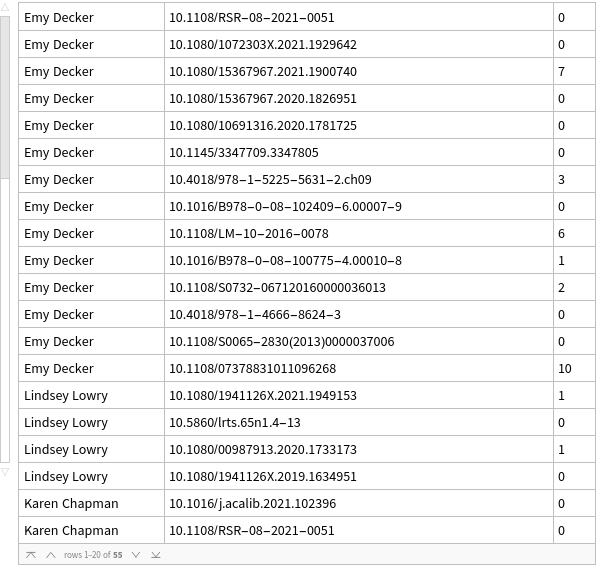

In [ ]:
citesFlat={};
For[i=1,i<=Length[cites],i++,
    For[j=1,j<=Length[cites[[i,2]]],j++,
       AppendTo[citesFlat, 
           Flatten[{cites[[i,1]],Transpose[{cites[[i,2]],cites[[i,3]]}][[j]]}]
        ]
    ]
]
citesFlat // Dataset

### Save Record Data to a file

Exporting the results as a file:

In [ ]:
For[i=1,i<=Length[authorList],i++,
    tempAuthorURL="https://api.elsevier.com/content/search/scopus?query=AU-ID("<>ToString[authorList[[i,2]]]<>")&apiKey="<>myAPIKey;
    tempAuthorData=Import[tempAuthorURL,"RawJSON"]["search-results"]["entry"];
    
    entries=Values[tempAuthorData][[All,;;9]];  (*Taking the first 9 columns of data*)
    keys=Keys[tempAuthorData[[1]]][[;;9]];
    csvDataset=PrependTo[entries,keys];
    
    Export[StringReplace[authorList[[i,1]]," "->"_"]<>"_"<>ToString[authorList[[i,2]]]<>"_"<>"ScopusData"<>".csv",csvDataset];
    Pause[2]
]

Importing one of the created files (first three elements):

In [ ]:
author3Import=Import["/home/.../Lindsey_Lowry_57210944451_ScopusData.csv",
                    "Dataset","EmptyField"->" ",HeaderLines->1];
author3Import[[;;3]] // Short

*Output not shown here*

Dataset[{Exploring the evidence-b<<58>>meets practice, <<3>>}, <<2>>]
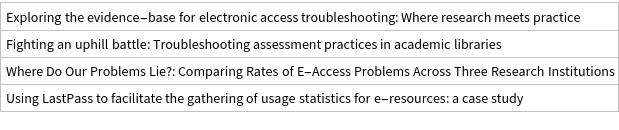

In [ ]:
author3Import[[All,"dc:title"]] // Short

## 3. Get References via a Title Search

### Number of Title Match Records

Search Scopus for all references containing' ChemSpider' in the record title

In [ ]:
q2=Import["https://api.elsevier.com/content/search/scopus?query=TITLE(ChemSpider)&apiKey="<>myAPIKey,
        "RawJSON"];
q2["search-results"]["opensearch:totalResults"]

7

Repeat this in a loop to get number of Scopus records for each title search

In [ ]:
titleWordList={"ChemSpider","PubChem","ChEMBL","Reaxys","SciFinder"};
numRecordsTitle={};

For[i=1,i<=Length[titleWordList],i++,
    qt=Import["https://api.elsevier.com/content/search/scopus?query=TITLE("<>titleWordList[[i]]<>")&apiKey="<>myAPIKey,"RawJSON"];
    numt=qt["search-results"]["opensearch:totalResults"];
    
    AppendTo[numRecordsTitle,{titleWordList[[i]],numt}];
    Pause[1]
]

numRecordsTitle

{{ChemSpider, 7}, {PubChem, 82}, {ChEMBL, 53}, {Reaxys, 8}, {SciFinder, 31}}

### Download Title Match Record Data

Download records and create a list of selected metadata

In [ ]:
titleWordList={"ChemSpider","PubChem","ChEMBL","Reaxys","SciFinder"};
scopusTitleData={};

For[i=1,i<=Length[titleWordList],i++,

    qt=Import["https://api.elsevier.com/content/search/scopus?query=TITLE("<>titleWordList[[i]]<>")&apiKey="<>myAPIKey,"RawJSON"]["search-results"]["entry"];
    doiList=qt[[All,"prism:doi"]];
    titleList=qt[[All,"dc:title"]];
    coverDateList=qt[[All,"prism:coverDate"]];
    
    AppendTo[scopusTitleData,{titleWordList[[i]],doiList,titleList,coverDateList}];
    Pause[1]
]

In [ ]:
scopusTitleData // Dataset

*Output not shown here*

{ChemSpider, {10.1039/c5np90022k, 10.1021/bk-2013-1128.ch020, 10.1007/s13361-011-0265-y, 
 
>    10.1002/9781118026038.ch22, 10.1021/ed100697w, Missing[KeyAbsent, prism:doi], 
 
>    Missing[KeyAbsent, prism:doi]}, 
 
>   {Editorial: ChemSpider-a tool for Natural Products research, 
 
>    ChemSpider: How a free community resource of data can support the teaching of nmr\
 
>     spectroscopy, Identification of "known unknowns" utilizing accurate mass data and\
 
>     chemspider, Chemspider: A Platform for Crowdsourced Collaboration to Curate Data\
 
>     Derived From Public Compound Databases, 
 
>    Chemspider: An online chemical information resource, 
 
>    Untangling the chemical web with ChemSpider: A new search engine community for\
 
>     chemists from the Royal Society of Chemistry, Along came chemspider...}, 
 
>   {2015-08-01, 2013-01-01, 2012-01-01, 2011-05-03, 2010-11-01, 2010-01-01, 2009-09-01}}
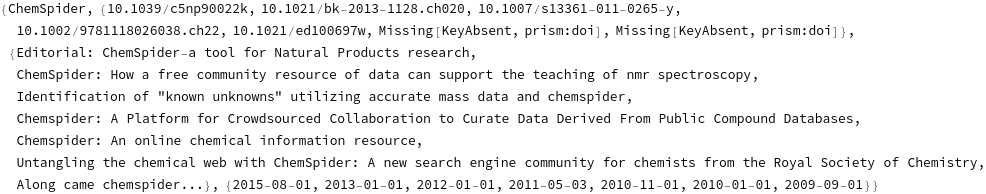

In [ ]:
scopusTitleData[[1]]

Creating a flat list of scopusTitleData

In [ ]:
scopusTitleDataFlat={};

For[i=1,i<=Length[titleWordList],i++,
    For[j=1,j<=Length[scopusTitleData[[i,2]]],j++,
        AppendTo[scopusTitleDataFlat,{titleWordList[[i]],scopusTitleData[[i,2,j]],scopusTitleData[[i,3,j]],scopusTitleData[[i,4,j]]}]
    ]
]

Dataset[{{ChemSpider, 10.1039/c5np90022k, 
 
>     Editorial: ChemSpider-a tool for Natural Products research, 2015-08-01}, 
 
>    {ChemSpider, 10.1021/bk-2013-1128.ch020, 
 
>     ChemSpider: How a free community resource of data can support the teaching of nmr\
 
>      spectroscopy, 2013-01-01}, {ChemSpider, 10.1007/s13361-011-0265-y, 
 
>     Identification of "known unknowns" utilizing accurate mass data and chemspider, 
 
>     2012-01-01}, {ChemSpider, 10.1002/9781118026038.ch22, 
 
>     Chemspider: A Platform for Crowdsourced Collaboration to Curate Data Derived From\
 
>      Public Compound Databases, 2011-05-03}, 
 
>    {ChemSpider, 10.1021/ed100697w, 
 
>     Chemspider: An online chemical information resource, 2010-11-01}, 
 
>    {ChemSpider, Missing[KeyAbsent, prism:doi], 
 
>     Untangling the chemical web with ChemSpider: A new search engine community for\
 
>      chemists from the Royal Society of Chemistry, 2010-01-01}, 
 
>    {ChemSpider, Missing[KeyAbsent, prism:doi], Along came chemspider..., 2009-09-01}, 
 
>    {PubChem, 10.1016/j.bioorg.2022.105648, 
 
>     Structure-based discovery of a specific SHP2 inhibitor with enhanced blood–brain\
 
>      barrier penetration from PubChem database, 2022-04-01}, 
 
>    {PubChem, 10.1007/s40011-021-01335-x, 
 
>     Identification a Novel Inhibitor for Aldo–Keto Reductase 1 C3 by Virtual Screening\
 
>      of PubChem Database, 2022-01-01}, 
 
>    {PubChem, 10.1007/978-1-0716-2067-0_27, 
 
>     Plant Reactome and PubChem: The Plant Pathway and (Bio)Chemical Entity\
 
>      Knowledgebases, 2022-01-01}, 
 
>    {PubChem, 10.1016/j.molstruc.2021.130968, 
 
>     3CL<sup>pro</sup> and PL<sup>pro</sup> affinity, a docking study to fight COVID19\
 
>      based on 900 compounds from PubChem and literature. Are there new drugs to be\
 
>      found?, 2021-12-05}, {PubChem, 10.1093/glycob/cwab078, 
 
>     Enhancing the interoperability of glycan data flow between ChEBI, PubChem and\
 
>      GlyGen, 2021-11-01}, {PubChem, 10.1002/cpz1.217, 
 
>     Exploring Chemical Information in PubChem, 2021-08-01}, 
 
>    {PubChem, 10.1515/cti-2020-0006, 
 
>     PubChem Periodic Table and Element pages: Improving access to information on\
 
>      chemical elements from authoritative sources, 2021-03-01}, 
 
>    {PubChem, 10.1093/nar/gkaa971, 
 
>     PubChem in 2021: New data content and improved web interfaces, 2021-01-08}, 
 
>    {PubChem, 10.3390/ijms21124380, 
 
>     Benchmarking data sets from pubchem bioassay data: Current scenario and room for\
 
>      improvement, 2020-06-01}, {PubChem, 10.1080/07391102.2020.1856185, 
 
>     A program to automate the discovery of drugs for West Nile and Dengue\
 
>      virus—programmatic screening of over a billion compounds on PubChem, generation\
 
>      of drug leads and automated in silico modelling, 2020-01-01}, 
 
>    {PubChem, 10.2174/1871526519666181205163810, 
 
>     Target discovery for new antitubercular drugs using a large dataset of growth\
 
>      inhibitors from pubchem, 2020-01-01}, 
 
>    {PubChem, 10.1002/minf.201900016, PubChem and ChEMBL beyond Lipinski, 2019-05-01}, 
 
>    {PubChem, 10.1093/nar/gky1033, 
 
>     PubChem 2019 update: Improved access to chemical data, 2019-01-08}, 
 
>    {PubChem, 10.1186/s13321-019-0375-2, 
 
>     Pug-View: Programmatic access to chemical annotations integrated in PubChem, 
 
>     2019-01-01}, {PubChem, 10.1038/sdata.2019.23, 
 
>     Analysis: Automated evaluation of consistency within the pubchem compound\
 
>      database, 2019-01-01}, {PubChem, 10.1186/s13321-018-0293-8, 
 
>     PubChem chemical structure standardization, 2018-12-01}, 
 
>    {PubChem, 10.1093/nar/gky294, An update on PUG-REST: RESTful interface for\
 
>      programmatic access to PubChem, 2018-07-02}, 
 
>    {PubChem, 10.1007/978-1-4939-8639-2_2, 
 
>     Finding Potential Multitarget Ligands Using PubChem, 2018-01-01}, 
 
>    {PubChem, 10.1177/2472555216685069, 
 
>     PubChem BioA
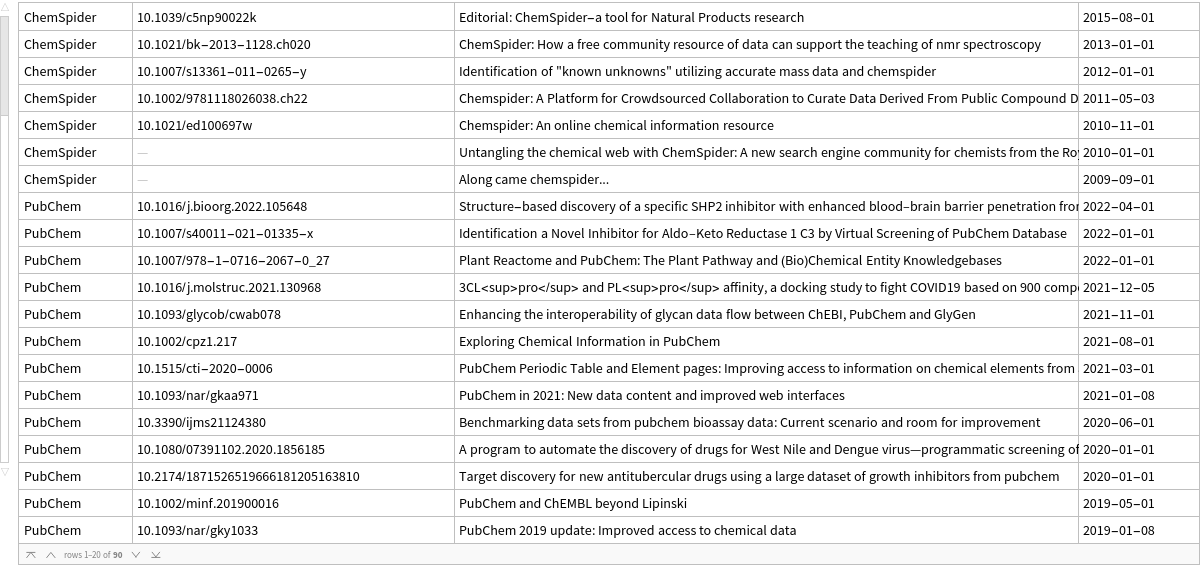

In [ ]:
scopusTitleDataFlat // Dataset

Dataset[{<|titleWord -> ChemSpider, doi -> 10.1039/c5np90022k, 
 
>     title -> Editorial: ChemSpider-a tool for Natural Products research, 
 
>     coverDate -> 2015-08-01|>, <|titleWord -> ChemSpider, 
 
>     doi -> 10.1021/bk-2013-1128.ch020, 
 
>     title -> ChemSpider: How a free community resource of data can support the\
 
>       teaching of nmr spectroscopy, coverDate -> 2013-01-01|>, 
 
>    <|titleWord -> ChemSpider, doi -> 10.1007/s13361-011-0265-y, 
 
>     title -> Identification of "known unknowns" utilizing accurate mass data and\
 
>       chemspider, coverDate -> 2012-01-01|>, 
 
>    <|titleWord -> ChemSpider, doi -> 10.1002/9781118026038.ch22, 
 
>     title -> Chemspider: A Platform for Crowdsourced Collaboration to Curate Data\
 
>       Derived From Public Compound Databases, coverDate -> 2011-05-03|>, 
 
>    <|titleWord -> ChemSpider, doi -> 10.1021/ed100697w, 
 
>     title -> Chemspider: An online chemical information resource, 
 
>     coverDate -> 2010-11-01|>, <|titleWord -> ChemSpider, 
 
>     doi -> Missing[KeyAbsent, prism:doi], 
 
>     title -> Untangling the chemical web with ChemSpider: A new search engine\
 
>       community for chemists from the Royal Society of Chemistry, 
 
>     coverDate -> 2010-01-01|>, <|titleWord -> ChemSpider, 
 
>     doi -> Missing[KeyAbsent, prism:doi], title -> Along came chemspider..., 
 
>     coverDate -> 2009-09-01|>, <|titleWord -> PubChem, 
 
>     doi -> 10.1016/j.bioorg.2022.105648, 
 
>     title -> Structure-based discovery of a specific SHP2 inhibitor with enhanced\
 
>       blood–brain barrier penetration from PubChem database, coverDate -> 2022-04-01|>\
 
>     , <|titleWord -> PubChem, doi -> 10.1007/s40011-021-01335-x, 
 
>     title -> Identification a Novel Inhibitor for Aldo–Keto Reductase 1 C3 by Virtual\
 
>       Screening of PubChem Database, coverDate -> 2022-01-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1007/978-1-0716-2067-0_27, 
 
>     title -> Plant Reactome and PubChem: The Plant Pathway and (Bio)Chemical Entity\
 
>       Knowledgebases, coverDate -> 2022-01-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1016/j.molstruc.2021.130968, 
 
>     title -> 3CL<sup>pro</sup> and PL<sup>pro</sup> affinity, a docking study to fight\
 
>       COVID19 based on 900 compounds from PubChem and literature. Are there new drugs\
 
>       to be found?, coverDate -> 2021-12-05|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1093/glycob/cwab078, 
 
>     title -> Enhancing the interoperability of glycan data flow between ChEBI, PubChem\
 
>       and GlyGen, coverDate -> 2021-11-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1002/cpz1.217, 
 
>     title -> Exploring Chemical Information in PubChem, coverDate -> 2021-08-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1515/cti-2020-0006, 
 
>     title -> PubChem Periodic Table and Element pages: Improving access to information\
 
>       on chemical elements from authoritative sources, coverDate -> 2021-03-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1093/nar/gkaa971, 
 
>     title -> PubChem in 2021: New data content and improved web interfaces, 
 
>     coverDate -> 2021-01-08|>, <|titleWord -> PubChem, doi -> 10.3390/ijms21124380, 
 
>     title -> Benchmarking data sets from pubchem bioassay data: Current scenario and\
 
>       room for improvement, coverDate -> 2020-06-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1080/07391102.2020.1856185, 
 
>     title -> A program to automate the discovery of drugs for West Nile and Dengue\
 
>       virus—programmatic screening of over a billion compounds on PubChem, generation\
 
>       of drug leads and automated in silico modelling, coverDate -> 2020-01-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.2174/1871526519666181205163810, 
 
>     title -> Target discovery for new antitubercular drugs using a large dataset of\
 
>       growth inhibitors from pubchem, coverDate -> 2020-01-01|>, 
 
>    <|titleWord -> PubChem, doi -> 10.1002
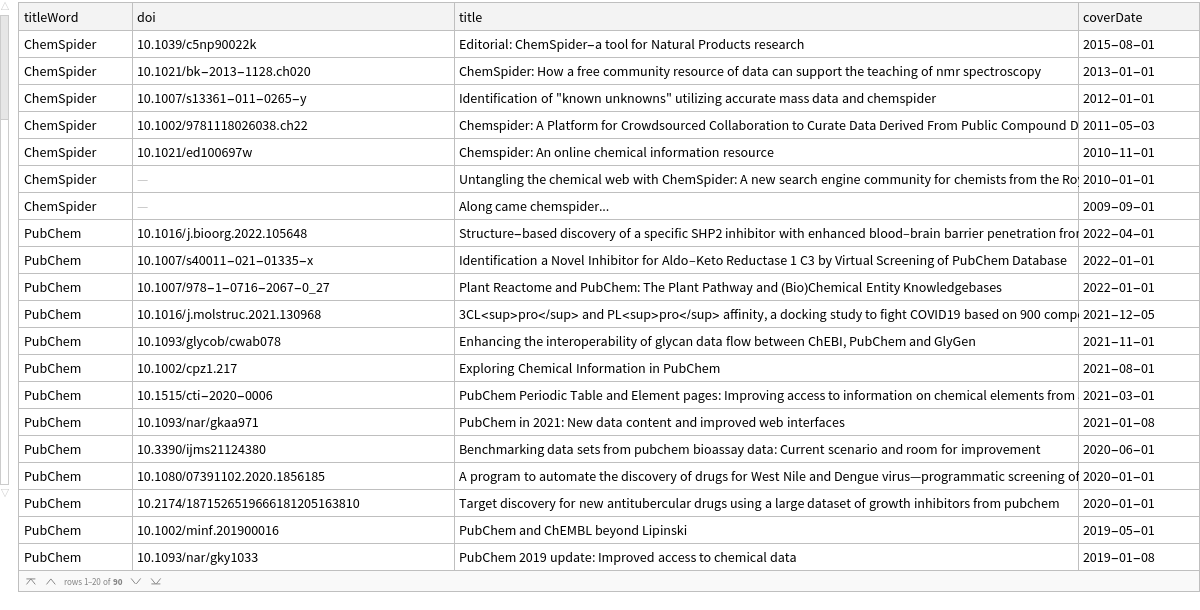

In [ ]:
scopusTitleDataFlatNamed =
    <|"titleWord"->scopusTitleDataFlat[[All,1]],"doi"->scopusTitleDataFlat[[All,2]],"title"->scopusTitleDataFlat[[All,3]],"coverDate"->scopusTitleDataFlat[[All,4]]|>;

Transpose[Dataset[scopusTitleDataFlatNamed]]